In [2]:
# Importing Libraries
import pandas as pd
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv('HousingData.csv')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


#**Preprocessing**

In [4]:
print('========== Describing the whole Dataset ====================')
print(df.describe())
print('========== Checking the Sample size and Features ====================')
print(df.shape)
print('=================== FEATURES ===================')
print(df.columns)


========== Describing the whole Dataset ====================
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  486.000000  486.000000  486.000000  486.000000  506.000000  506.000000   
mean     3.611874   11.211934   11.083992    0.069959    0.554695    6.284634   
std      8.720192   23.388876    6.835896    0.255340    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.081900    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.253715    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.560263   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  486.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.518519    3.795043    9.549407  408.

**Cheking Null Vlaues**

In [5]:
print(df.isnull().sum())
print('=============== Checking Data Type =================')
print(df.dtypes)

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64
=============== Checking Data Type =================
CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


**Handling Null Values**

In [6]:
# Filling null values with Mean

df.fillna(df.mean(),inplace=True)


<ipython-input-7-8490618771fd>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v, ax=axs[index])
<ipython-input-7-8490618771fd>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v, ax=axs[index])
<ipython-input-7-8490618771fd>:5: UserWarning: 

`distplot` is a deprecated function and will be rem

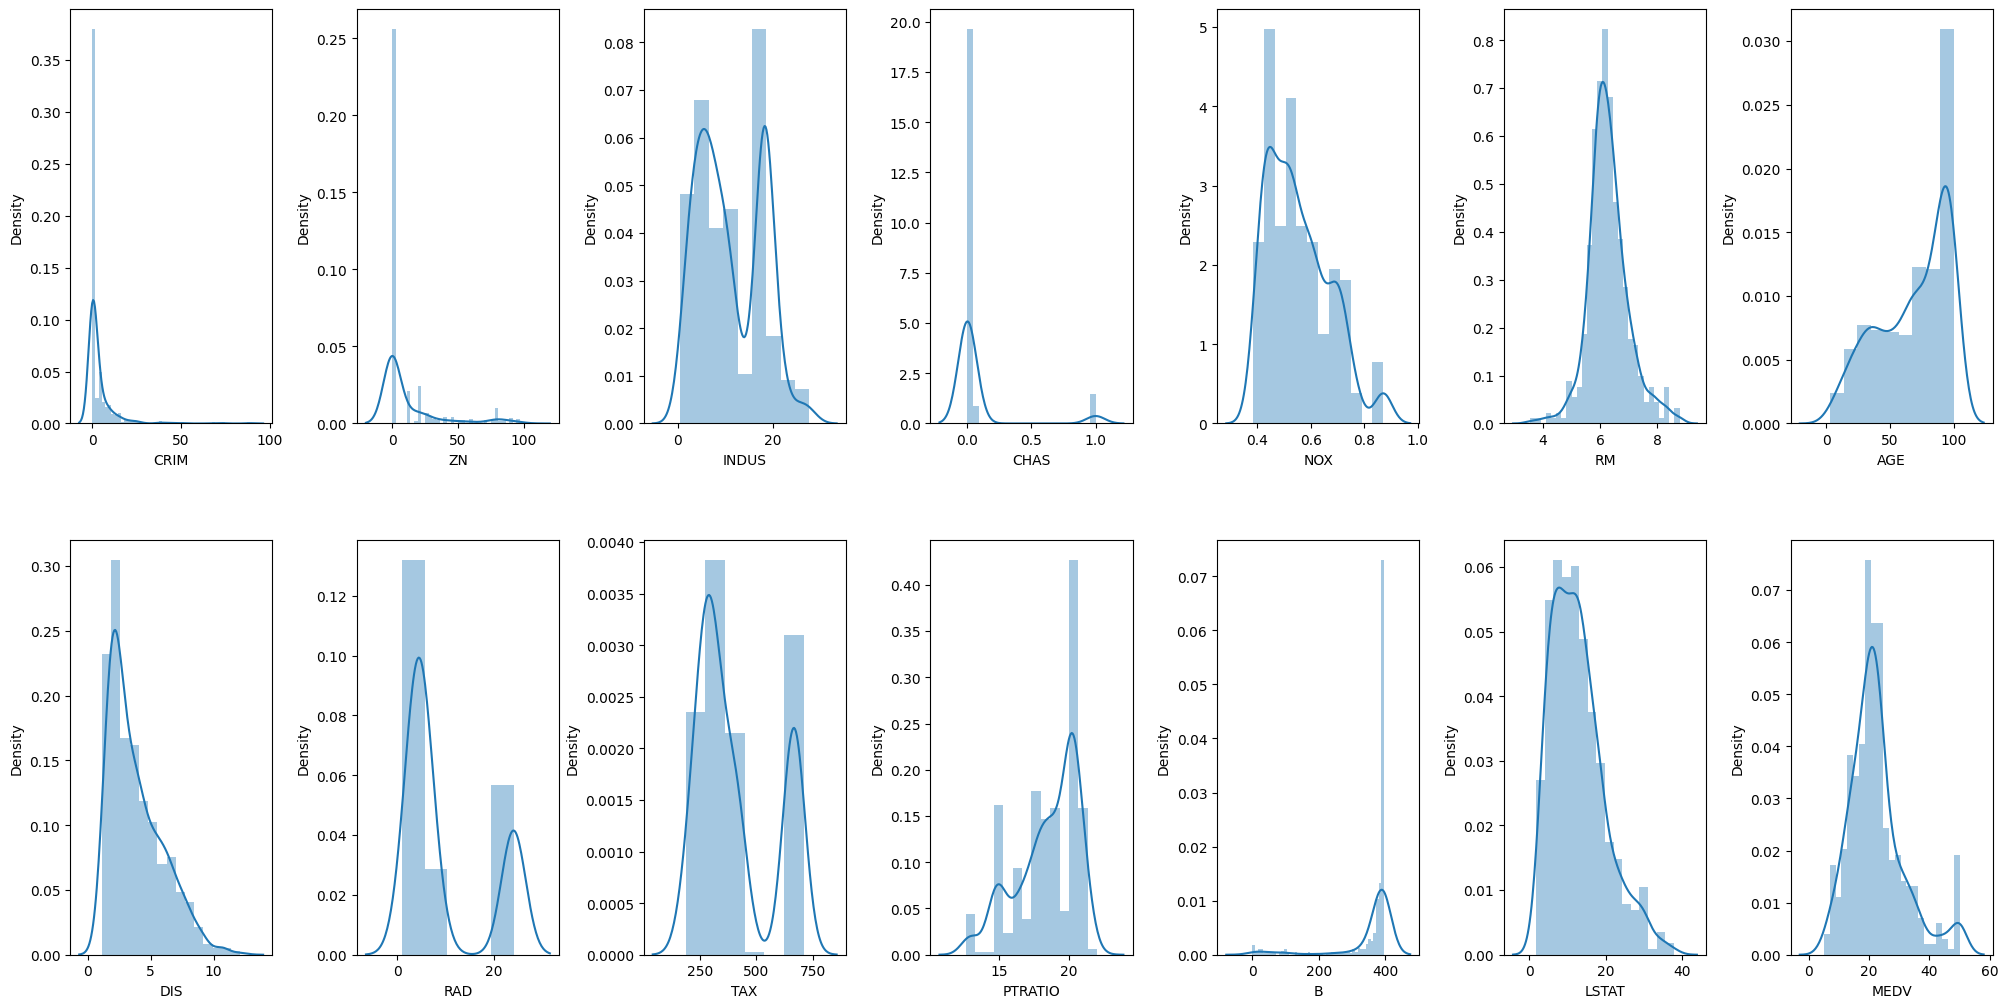

In [7]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

The histogram also shows that columns CRIM, ZN, B has highly skewed distributions. Also MEDV looks to have a normal distribution (the predictions) and other colums seem to have norma or bimodel ditribution of data except CHAS (which is a discrete variable).

**Correlation**

<Axes: >

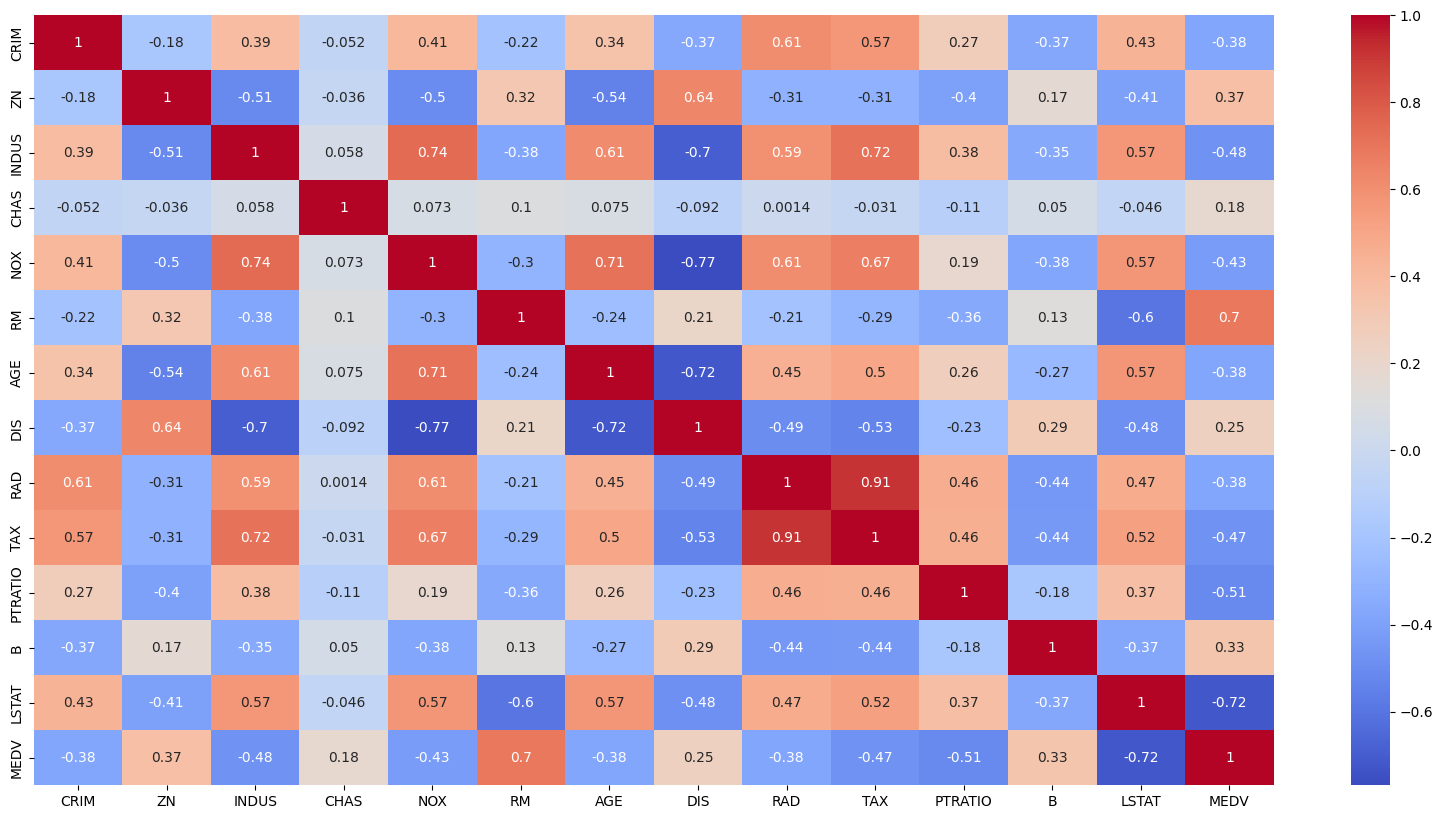

In [8]:
import seaborn as sns
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot = True, cmap='coolwarm')

From correlation matrix, we see TAX and RAD are highly correlated features. The columns LSTAT, INDUS, RM, TAX, NOX, PTRAIO has a correlation score above 0.5 with MEDV which is a good indication of using as predictors. Let's plot these columns against MEDV.

#**Splitting Data Into Training and Testing**

In [9]:
x=df
y=df.pop('MEDV')

from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,train_size=0.7)



In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)
print(X_train)


[[-0.41557761 -0.49082349 -1.23998793 ... -0.3511029   0.40020278
  -1.15385686]
 [-0.42251472  1.85718897  0.03101096 ... -0.44682136  0.33258852
  -1.18447091]
 [-0.42350246  2.07064465 -1.17071961 ... -1.404006    0.39195714
  -1.12324281]
 ...
 [-0.39602217 -0.49082349 -0.14348506 ... -0.0639475   0.42417012
  -0.14796664]
 [-0.42428853  3.35137872 -1.42421221 ... -2.36119064  0.41559465
  -1.39585364]
 [-0.15459509 -0.49082349  0.03101096 ... -1.83473909  0.37370679
   2.44839639]]


#**Linear Regression**

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


===================== Mean of MSE using CROSS VALIDATION ====================
-16.66738864859142
=============== Prediction ================
[ 1.42881834e+01  1.75949879e+01  2.17020346e+01  1.79448084e+01
  1.72368027e+01  2.94659194e+01  1.99435367e+01  2.16525346e+01
  2.82054726e+01  2.18334787e+01  1.78824365e+01  2.54179131e+01
  2.20821180e+01  2.12333853e+01  1.56741906e+01  1.56754844e+01
  2.12786712e+01  3.15432613e+01  3.86511922e+01  2.54867326e+01
  1.92556045e+01  3.68029757e+01  3.22742971e+01  4.04288170e+00
  2.26789852e+01  1.53427247e+01  1.06350742e+01 -4.05785436e+00
  2.00316987e+01  3.11672633e+01  3.49649860e+01  1.56430787e+01
  1.21087421e+01  1.40664466e+01  1.72461241e+01  4.24093614e+01
  2.02500818e+01  2.23529127e+01  2.09667366e+01  3.46251966e+01
  2.11429344e+01  2.00455796e+01  3.14522287e+01  2.16202610e+01
  2.22195224e+01  4.00146127e+01  1.98395388e+01  1.90261572e+01
  1.19810668e+01  4.46064065e+01  2.31023261e+01  3.26386203e+01
  2.46865695e-

0.3194404635391561

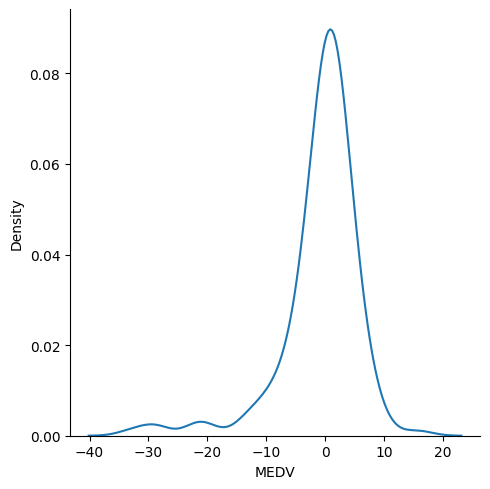

In [12]:
regression=LinearRegression()
regression.fit(X_train,y_train)
mse=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=10)
print('===================== Mean of MSE using CROSS VALIDATION ====================')
print(np.mean(mse))
##prediction
reg_pred=regression.predict(X_test)
print('=============== Prediction ================')
print(reg_pred)
import seaborn as sns
sns.displot(reg_pred-y_test,kind='kde')
from sklearn.metrics import r2_score
score=r2_score(reg_pred,y_test)
print('=============== Score ================')
score


#Support Vector Regressor

Average Mean Squared Error: -25.243571069716204
=============== Prediction ================
[17.44775902 17.82485367 20.2705055  15.8999575  21.04863318 23.80581161
 20.33222081 19.78176067 27.24252393 20.15043295 16.42202966 24.41345039
 19.77836199 18.61205829 17.1713679  15.45885548 20.96232662 29.00439559
 33.30241945 25.39788348 18.11682567 29.11516478 29.97347322 12.16289496
 20.84766829 16.45313909 12.58046009 18.28410668 17.99258443 27.23329995
 32.37415017 19.04314319 13.26969368 17.78579766 20.03898748 33.67102209
 20.33127449 21.49763082 18.47704974 27.12761976 20.22973352 19.81784029
 30.37075946 21.61416002 21.07216992 28.23031809 17.99720675 18.14618112
 15.79928545 30.98095084 22.5291989  29.11192018 14.72543804 13.83481595
 19.65771109 15.89580187 15.96560059 28.38291519 33.63946072 23.89587509
 23.7632628  21.11269693 25.89756948 21.03331474 30.06880931 19.54198968
 17.98155536 25.906486   15.20304889 16.85018213 20.53882886 10.94855881
 20.73322114 23.527528   21.8428

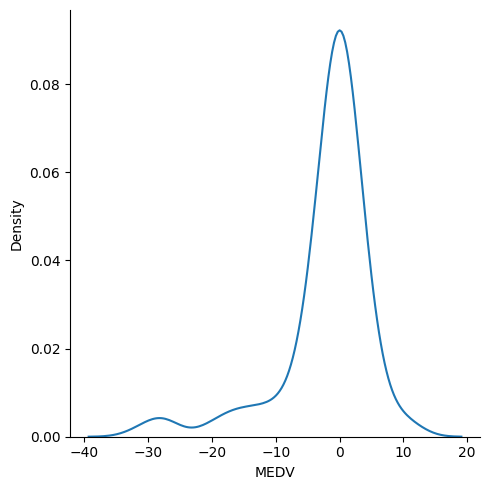

In [13]:
from sklearn.svm import SVR

regressor = SVR(kernel='rbf', C=1.0, epsilon=0.1)
SVR_reg = regressor.fit(X_train, y_train)
mse = cross_val_score(regressor, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
print("Average Mean Squared Error:", np.mean(mse))

## Prediction
reg_pred = SVR_reg.predict(X_test)
print('=============== Prediction ================')
print(reg_pred)

sns.displot(reg_pred - y_test, kind='kde')

score = r2_score(y_test, reg_pred)
print('=============== Score ================')
print(score)


#KNN Regressor

In [15]:
from sklearn.neighbors import KNeighborsRegressor

regressor = KNeighborsRegressor(n_neighbors=5)
KNN_reg = regressor.fit(X_train, y_train)
mse = cross_val_score(regressor, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
print("Average Mean Squared Error:", np.mean(mse))

## Prediction
reg_pred = KNN_reg.predict(X_test)
print('=============== Prediction ================')
print(reg_pred)

Average Mean Squared Error: -16.55123952380952
=============== Prediction ================
[19.7  19.36 21.04 15.04 20.8  30.4  21.62 20.58 22.76 17.92 17.72 24.36
 18.68 23.36 18.36 17.06 22.36 25.76 40.16 24.3  19.96 37.34 26.74  9.1
 19.64 15.64  9.06 11.3  20.04 32.66 37.46 19.34 11.48 19.02 21.3  41.52
 19.22 22.32 17.2  30.24 19.86 20.24 32.12 21.22 19.74 31.6  18.   17.92
 14.54 42.44 21.62 34.02  9.48 13.14 20.06 19.32 16.66 33.26 40.16 22.2
 23.64 22.52 22.12 21.3  29.92 19.3  19.52 23.28 11.62 15.98 21.28 15.2
 19.34 24.4  21.94 24.86 16.3  24.4  13.12 13.34 23.66 16.8  17.48 38.12
 17.78 16.68 27.12 22.18 21.7  23.26 23.68 16.3  15.38 24.06 22.16 19.76
 21.98 22.72 40.94 41.6  24.48 13.08 23.42 21.78 18.42 25.94 11.62 23.08
 22.56 23.38 22.64 26.46 15.88 18.3  19.08 24.88 12.36 21.76 22.62 40.74
 16.68 24.26 21.48 30.02 25.38 18.92 14.04 15.34 21.62 24.82 16.3  38.46
 23.3  18.96 17.34 14.22 36.56 17.36 19.58 22.94 32.24 12.1  38.46 11.84
 22.98 18.66 21.62 15.76 16.62  9.96

#Random Forest Regressor

Average Mean Squared Error: -8.64144243261905
=============== Prediction ================
[18.398 18.942 21.53  16.034 22.5   23.945 20.947 20.885 24.954 19.319
 18.241 24.536 18.105 21.47  18.547 19.169 20.55  27.501 48.056 25.178
 19.078 48.96  31.816  7.029 16.076 18.747  8.926  7.967 16.986 27.509
 34.584 16.861 11.235 15.291 19.273 43.47  22.549 21.388 20.735 29.806
 21.515 20.292 31.328 20.078 21.318 45.454 18.729 17.918 14.081 48.808
 20.073 32.215 11.058 14.886 21.136 15.301 17.372 28.428 47.887 23.527
 26.011 21.904 22.729 21.039 32.313 21.011 17.428 24.167 14.05  14.258
 20.907 10.453 22.037 24.03  19.975 26.163 14.928 30.849 12.437 13.574
 21.622 15.566 20.332 48.061 20.216 15.758 45.022 23.358 23.551 22.607
 23.169 15.835 15.874 24.022 22.92  24.486 21.274 21.66  45.912 48.728
 24.221 14.017 20.479 22.582 16.697 28.555  8.398 24.678 26.394 24.242
 19.258 24.656 19.645 21.733 20.538 22.464 14.266 25.354 20.843 45.661
 18.342 23.812 22.029 33.822 25.972 20.799 13.727 14.846 2

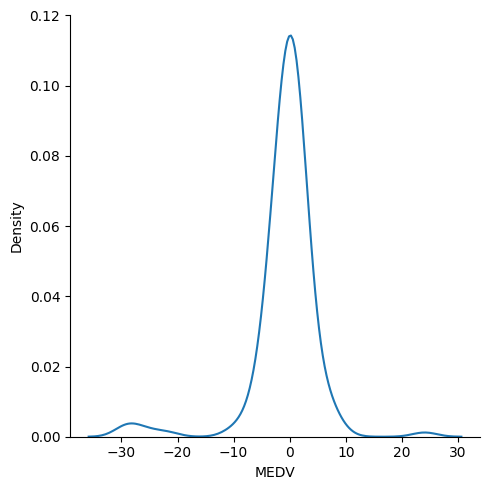

In [16]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, max_depth=20, random_state=0)
RF_reg = regressor.fit(X_train, y_train)
mse = cross_val_score(regressor, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
print("Average Mean Squared Error:", np.mean(mse))

## Prediction
reg_pred = RF_reg.predict(X_test)
print('=============== Prediction ================')
print(reg_pred)

sns.displot(reg_pred - y_test, kind='kde')

score = r2_score(y_test, reg_pred)
print('=============== Score ================')
print(score)


#**DECISION TREE REGRESSOR**

=============== Prediction ================
[21.7 20.3 22.  15.7 20.6 23.7 21.7 20.6 24.8 16.8 18.7 23.7 17.1 19.3
 20.3 19.1 20.9 30.8 50.  28.  17.8 48.5 36.4  7.4 13.8 19.1  8.5  8.5
 14.3 28.  36.1 20.4  9.7  9.7 18.8 37.6 25.  19.9 25.  28.  23.2 22.7
 31.2 19.4 23.2 44.  16.1 16.1 14.6 48.8 18.9 37.3 13.1 13.4 23.  12.
 18.8 26.7 50.  23.  28.4 23.1 25.  19.9 30.3 21.7 20.4 23.8 15.  14.4
 21.7 15.7 18.4 23.7 20.3 26.6 12.5 29.  10.2 11.8 20.7 18.4 18.4 50.
 22.6 11.3 50.  23.1 20.8 20.1 23.4 15.2 14.1 24.8 20.8 24.3 22.5 19.8
 50.  50.  24.4 14.1 17.5 24.4 13.8 32.5  8.5 30.1 24.5 23.1 19.9 24.5
 16.2 20.6 23.  21.6 11.7 21.7 19.9 50.  15.3 23.7 23.9 29.  18.4 19.3
 15.2 12.8 27.1 28.   8.5 36.5 20.1 18.7 15.4 12.7 45.4 13.4 18.5 20.3
 50.  14.6 33.8 14.1 25.  20.2 22.3 13.3 21.4  8.3 37.2 20.8]
=============== Score ================


0.5951046301530869

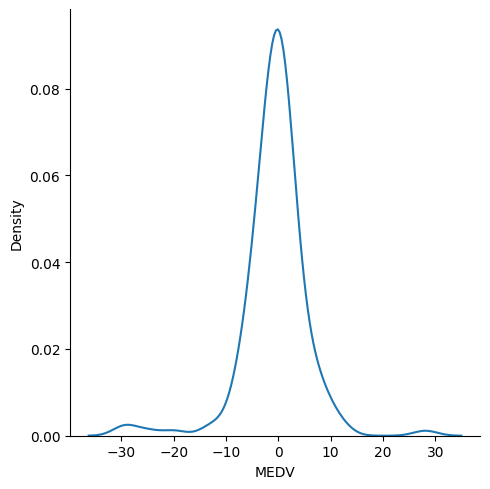

In [17]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=20,random_state=0)
DT_reg=regressor.fit(X_train, y_train)
mse=cross_val_score(DT_reg,X_train,y_train,scoring='neg_mean_squared_error',cv=10)
np.mean(mse)
##prediction
reg_pred=DT_reg.predict(X_test)
print('=============== Prediction ================')
print(reg_pred)
import seaborn as sns
sns.displot(reg_pred-y_test,kind='kde')
from sklearn.metrics import r2_score
score=r2_score(reg_pred,y_test)
print('=============== Score ================')
score

#Gradient Boosting Regressor

Average Mean Squared Error: -7.618915276416378
=============== Prediction ================
[16.90657559 19.91070541 20.50238156 16.49824512 26.15509233 24.4723652
 17.85255612 21.34890146 25.40911196 19.24566062 16.246952   26.66174853
 18.62865378 22.77725882 18.41439329 19.33942725 20.38240466 28.87837606
 45.54697846 26.06309748 18.88274916 49.87606709 31.68281646  8.31432035
 19.00680154 17.85567004  8.433169    9.90283012 18.15936589 29.73291527
 34.88145547 19.57705219 11.45902945 14.41608034 18.17829722 42.11206545
 20.93859812 21.33466679 19.67493893 31.7942001  21.73070679 20.77183791
 30.98402648 20.27044931 19.8912549  46.17424948 17.74418146 18.13411833
 13.04353479 49.74304981 20.73732536 32.41838431 12.39694114 14.67041955
 20.42425685 15.29971227 15.93454718 31.1725618  45.59224637 23.15666742
 25.73918603 21.62046102 23.73344184 20.83607458 32.28096407 21.23295735
 17.7189192  24.86898208 14.18717037 16.62019234 20.35393754 11.28868218
 20.64462932 24.27075551 20.246821

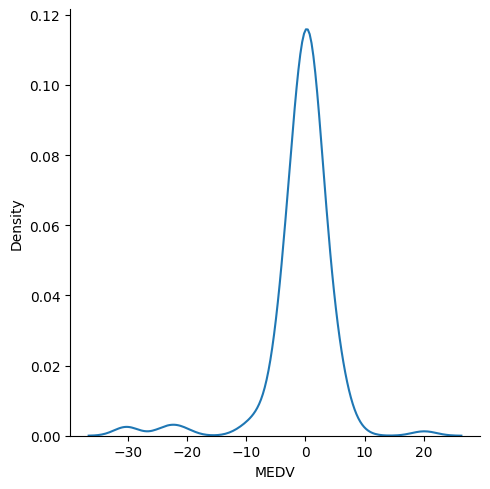

In [18]:
from sklearn.ensemble import GradientBoostingRegressor

regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)
GB_reg = regressor.fit(X_train, y_train)
mse = cross_val_score(regressor, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
print("Average Mean Squared Error:", np.mean(mse))

## Prediction
reg_pred = GB_reg.predict(X_test)
print('=============== Prediction ================')
print(reg_pred)

sns.displot(reg_pred - y_test, kind='kde')

score = r2_score(y_test, reg_pred)
print('=============== Score ================')
print(score)


#AdaBoost

Average Mean Squared Error: -10.664132391802776
=============== Prediction ================
[18.69402985 20.80235294 21.02277228 15.94166667 20.095      23.11090909
 19.57358491 21.02289157 25.59253731 18.53135593 17.55348837 23.91267606
 17.37471264 21.02277228 20.80235294 17.62345679 21.6212963  26.97179487
 47.2        25.64936709 19.56703297 47.42631579 32.78372093 10.25
 17.25061728 17.44683544 10.78703704 10.27115385 17.7016129  26.63877551
 33.15909091 18.375      11.64545455 16.73157895 18.37553191 42.78
 21.20512821 21.30675676 18.25932203 27.4        20.40568182 20.27564103
 32.06557377 21.04059406 20.43191489 46.325      18.51830986 17.65151515
 13.49101124 47.03913043 21.02289157 30.17142857 10.796      17.39803922
 21.02289157 17.12121212 17.57460317 30.46133333 47.2        22.84186047
 22.79387755 21.33944954 23.98181818 19.34310345 32.56333333 20.82936508
 18.375      25.21866667 14.15555556 13.49101124 20.50952381 11.00851064
 21.02277228 24.60155039 18.37553191 25.6493

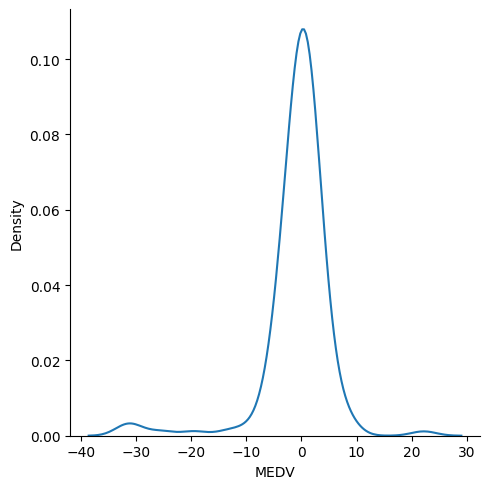

In [19]:
from sklearn.ensemble import AdaBoostRegressor

regressor = AdaBoostRegressor(n_estimators=100, learning_rate=0.1, random_state=0)
AB_reg = regressor.fit(X_train, y_train)
mse = cross_val_score(regressor, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
print("Average Mean Squared Error:", np.mean(mse))

## Prediction
reg_pred = AB_reg.predict(X_test)
print('=============== Prediction ================')
print(reg_pred)

sns.displot(reg_pred - y_test, kind='kde')

score = r2_score(y_test, reg_pred)
print('=============== Score ================')
print(score)


#Ridge Regression

Average Mean Squared Error: -16.65342190040841
=============== Prediction ================
[ 1.43087756e+01  1.75933310e+01  2.17019311e+01  1.79000094e+01
  1.72012787e+01  2.94712631e+01  1.99728811e+01  2.16215144e+01
  2.81909015e+01  2.17409272e+01  1.78936138e+01  2.54306344e+01
  2.19878196e+01  2.12068101e+01  1.57051444e+01  1.56551308e+01
  2.13093506e+01  3.15329547e+01  3.86216141e+01  2.55035629e+01
  1.92402528e+01  3.67852260e+01  3.22566594e+01  4.04760371e+00
  2.27423554e+01  1.53270479e+01  1.06552605e+01 -4.01035373e+00
  2.00182611e+01  3.10786320e+01  3.48893425e+01  1.56119821e+01
  1.20941116e+01  1.41271840e+01  1.72446223e+01  4.23653104e+01
  2.02562837e+01  2.23430951e+01  2.09311661e+01  3.45908551e+01
  2.11565654e+01  2.00590852e+01  3.14796234e+01  2.16913054e+01
  2.22443203e+01  3.99892243e+01  1.98550016e+01  1.90164482e+01
  1.20519060e+01  4.45706640e+01  2.31153316e+01  3.25712938e+01
  9.32700652e-03  1.68119242e+01  2.01809289e+01  1.55318682e+01

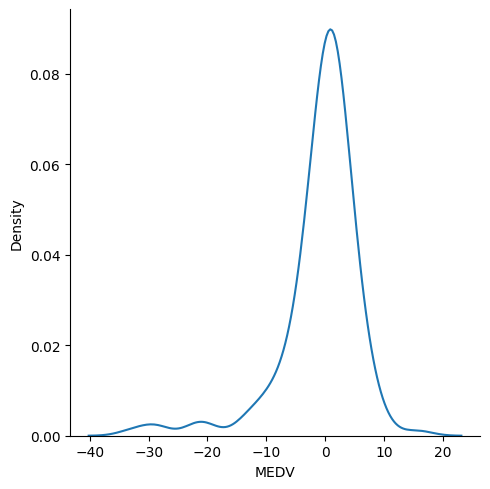

In [20]:
from sklearn.linear_model import Ridge

regressor = Ridge(alpha=1.0)
Ridge_reg = regressor.fit(X_train, y_train)
mse = cross_val_score(regressor, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
print("Average Mean Squared Error:", np.mean(mse))

## Prediction
reg_pred = Ridge_reg.predict(X_test)
print('=============== Prediction ================')
print(reg_pred)

sns.displot(reg_pred - y_test, kind='kde')

score = r2_score(y_test, reg_pred)
print('=============== Score ================')
print(score)


#Lassor Regressor

Average Mean Squared Error: -17.128929191524463
=============== Prediction ================
[14.75261684 17.41703347 21.75537599 17.17086678 15.88608643 29.53754096
 20.64694751 21.03277496 27.93833656 20.80604551 17.78859627 25.67942666
 21.06843861 20.29463955 16.19626288 15.0234854  21.70104157 31.15569857
 38.61854262 25.97011346 19.33376888 37.41089974 32.03231604  3.71147313
 23.91951829 14.68164423 11.390085   -3.06223473 19.85482929 29.45954424
 33.40658291 14.91334707 11.47530933 15.60980087 16.72237787 41.873008
 20.35132985 22.25437234 20.13803825 33.43379316 21.1770285  19.95018368
 31.86912003 22.57375896 22.49919438 39.40317983 19.98727626 18.81468856
 13.05115367 44.33223008 23.3413466  31.11026858 -0.92213591 17.23454667
 19.38444623 15.16074884 17.11704758 31.47521448 37.93460305 25.17597425
 25.68411124 22.0245597  27.99011017 17.56311021 35.65419334 20.50103588
 19.93760078 27.49054564 19.76304295 17.67722529 21.61178262 11.77864033
 22.35391911 25.72928355 23.443572

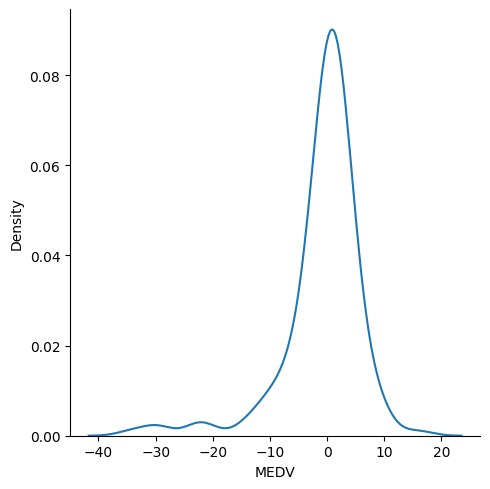

In [21]:
from sklearn.linear_model import Lasso

regressor = Lasso(alpha=0.1)
Lasso_reg = regressor.fit(X_train, y_train)
mse = cross_val_score(regressor, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
print("Average Mean Squared Error:", np.mean(mse))

## Prediction
reg_pred = Lasso_reg.predict(X_test)
print('=============== Prediction ================')
print(reg_pred)

sns.displot(reg_pred - y_test, kind='kde')

score = r2_score(y_test, reg_pred)
print('=============== Score ================')
print(score)
